In [40]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from matplotlib.legend_handler import HandlerTuple
import random as rd
import functools
WPCdata = pd.read_csv('padelWorldCupDicc.csv')
WPCdata

,equipoID,nombreEq,nombreJug1,nombreJug2,sets_ganados,sets_perdidos,partidos_ganados,partidos_perdidos,enfrentamientos,puntos,puntos_por_jornada,dineroGenerado,mediaEspectadoresPorEquipo,entradasVendidasPorEquipo,pais
0,1,electroingenieros,Juan,Pedrito,11,7,4,3,"[2, 4, 3, 10, 5, 7, 6]",8,"[0, 2, 2, 4, 4, 4, 6, 8]",650,550,100,España
1,2,termonuecleares,Pedro,Adrian,11,7,4,3,"[1, 8, 10, 7, 4, 6, 9]",8,"[0, 0, 0, 2, 4, 4, 6, 8]",700,405,80,EEUU
2,3,ElPAPITO,Pablo,Elena,7,10,3,4,"[4, 9, 1, 6, 7, 5, 10]",6,"[0, 0, 2, 2, 2, 4, 4, 6]",600,900,90,China
3,4,LosPibes,Elena,Blanca,12,5,6,1,"[3, 1, 5, 8, 2, 10, 7]",12,"[0, 2, 4, 6, 6, 8, 10, 12]",1200,830,70,URS
4,5,herculanos,Carlos,Ana,9,10,3,4,"[6, 10, 4, 9, 1, 3, 8]",6,"[0, 0, 2, 2, 2, 4, 6, 6]",600,450,100,China
5,6,Palilleros,Federico,Carlos,11,7,5,2,"[5, 7, 8, 3, 9, 2, 1]",10,"[0, 2, 4, 6, 8, 10, 10, 10]",950,670,80,Nepal
6,7,MaurosTeam,Mauro,Alex,5,11,2,5,"[8, 6, 9, 2, 3, 1, 4]",4,"[0, 0, 0, 2, 2, 2, 2, 4]",500,880,90,Republica Democratica del Congo
7,8,ParricaElMejor,Parra,Teresa,7,11,3,4,"[7, 2, 6, 4, 10, 9, 5]",6,"[0, 2, 4, 4, 6, 6, 6, 6]",600,550,100,España
8,9,Ganadores,Gonzalo,Paco,8,9,3,4,"[10, 3, 7, 5, 6, 8, 2]",6,"[0, 2, 2, 2, 4, 4, 6, 6]",1150,950,120,China
9,10,UltraTeam,Sara,Luis,7,11,2,5,"[9, 5, 2, 1, 8, 4, 3]",4,"[0, 0, 0, 0, 2, 4, 4, 4]",600,800,80,Nigeria


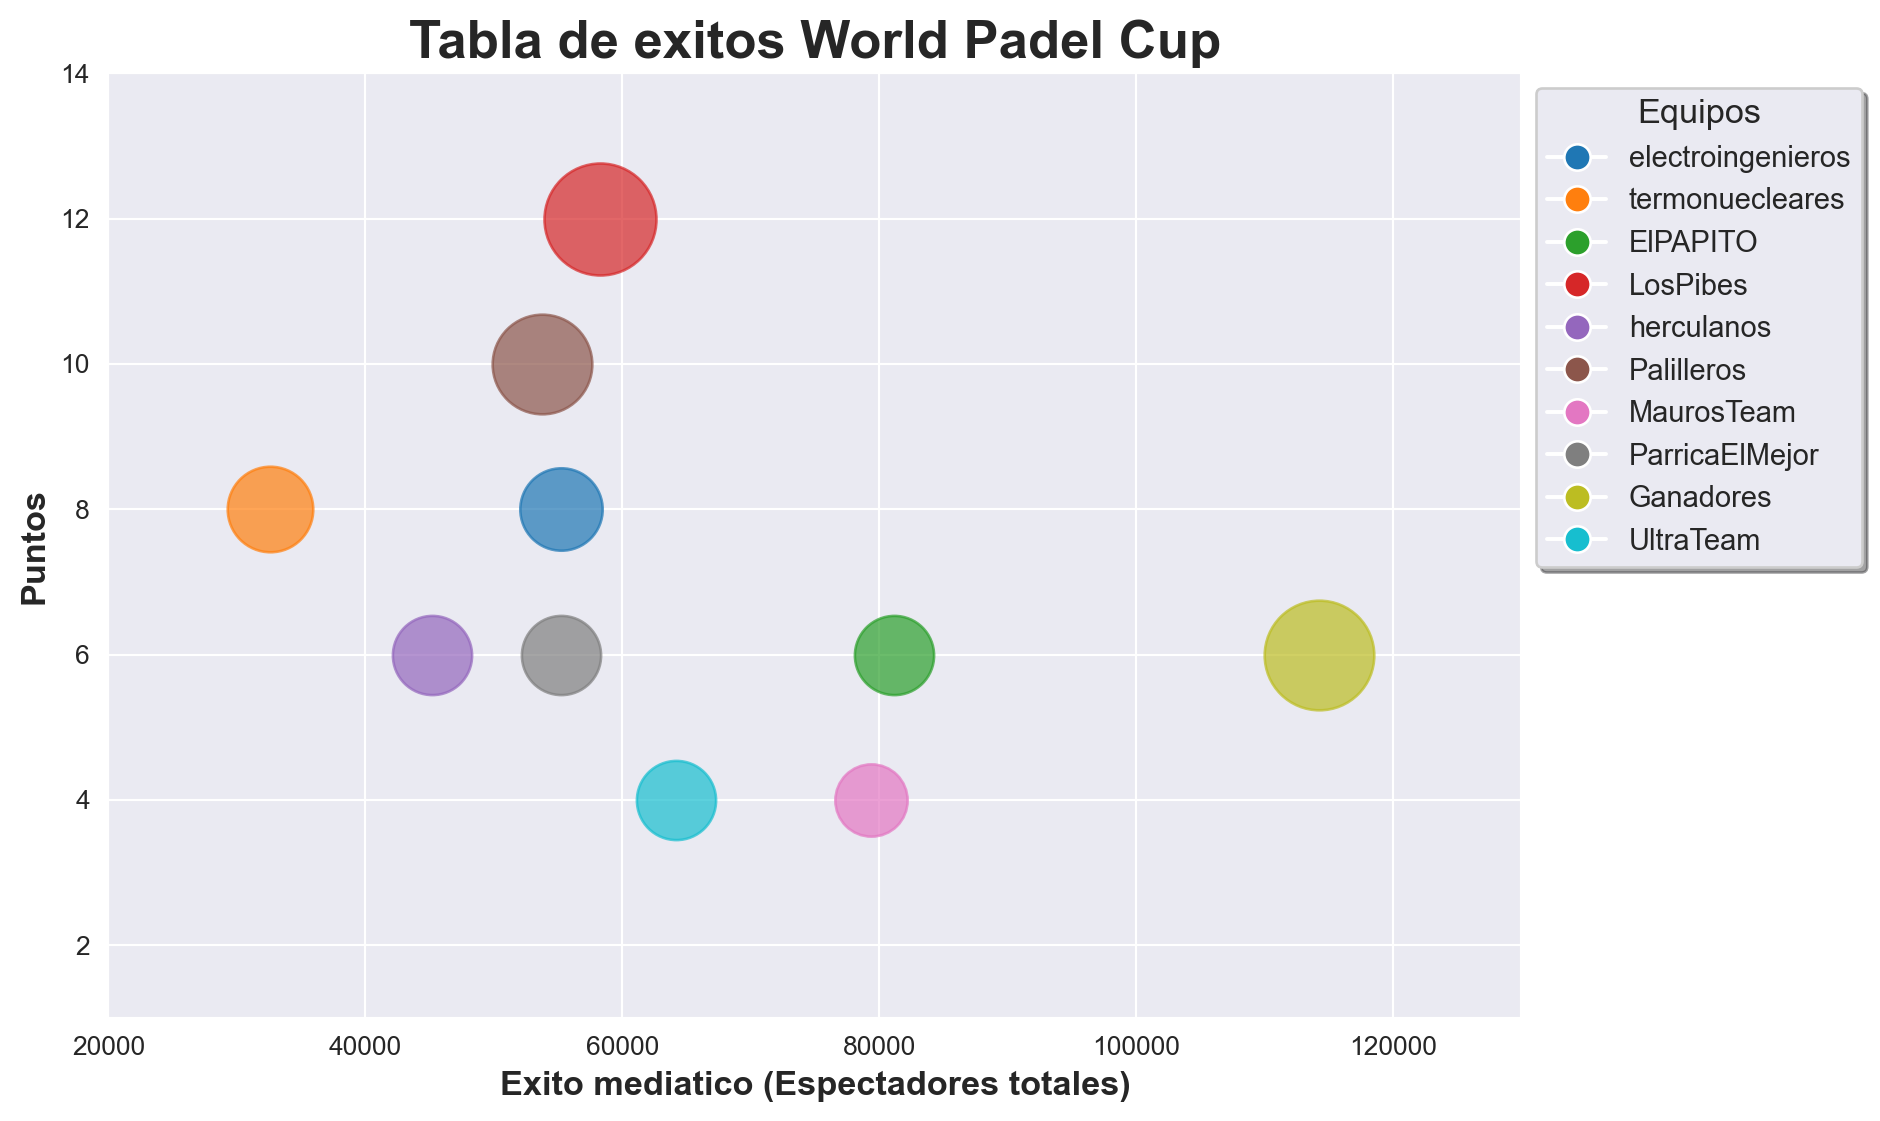

In [238]:

# Definir colores únicos para cada equipo
colores = plt.cm.tab10(range(len(WPCdata))) 

# Calcular el tamaño de los puntos según el dinero generado (aumentado para exagerar)
tamaño_puntos = WPCdata['dineroGenerado']*1.8 / WPCdata['dineroGenerado'].max() * 1000

# Crear el gráfico de dispersión (scatter plot)
plt.figure(figsize=(10, 6),dpi=190)
leyenda = []

exito_mediatico = list(WPCdata['entradasVendidasPorEquipo'])

for i in range(len(exito_mediatico)):
    exito_mediatico[i] *= 2 + WPCdata['mediaEspectadoresPorEquipo'][i]

    
for i in range(len(WPCdata)):
    plt.scatter(exito_mediatico[i], WPCdata['puntos'][i], s=tamaño_puntos[i], color=colores[i], alpha=0.7)
    leyenda.append(plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colores[i], label=WPCdata['nombreEq'][i]))


# Añadir leyenda personalizada
plt.legend(handles=leyenda, loc='upper left', bbox_to_anchor=(1, 1) , title='Equipos', title_fontsize='13', fontsize='11', shadow=True)


# Añadir etiquetas y título
plt.title('Tabla de exitos World Padel Cup', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Exito mediatico (Espectadores totales)', fontdict={'size':13, 'weight':'bold'})
plt.ylabel('Puntos', fontdict={'size':13, 'weight':'bold'})

plt.ylim(1,14)
plt.xlim(20000,130000)
# Mostrar el gráfico
plt.tight_layout()
plt.show()


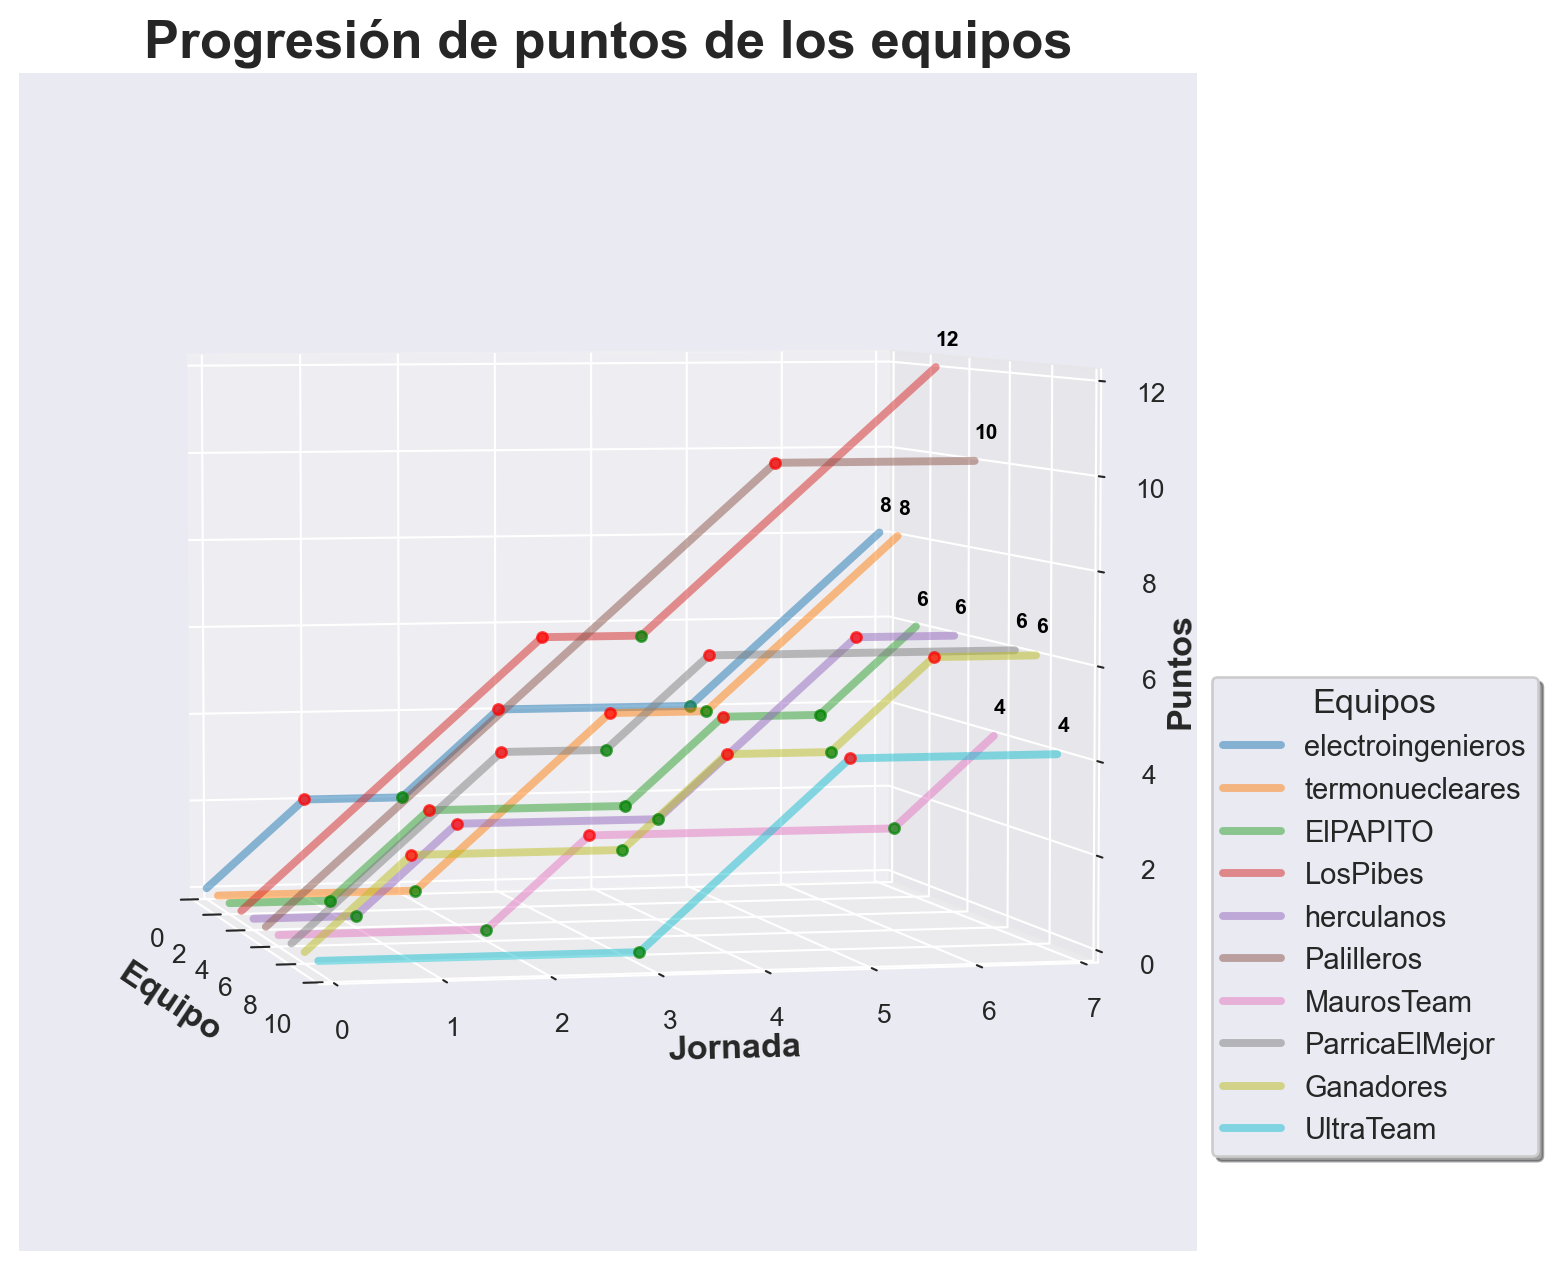

In [239]:

# Lista con las progresiones de puntos de los equipos
progresiones_equipos = np.array(WPCdata['puntos_por_jornada'].apply(eval).tolist())

jornadas = range(0, len(progresiones_equipos[0]) )

# Número de equipos
num_equipos = len(progresiones_equipos)

# Crear figura 3D con mayor tamaño
fig = plt.figure(figsize=(8, 12), dpi=190)
ax = fig.add_subplot(111, projection='3d')


colores = plt.cm.tab10(range(num_equipos))

for equipo, puntos in enumerate(progresiones_equipos):
    ax.plot( [equipo] * len(jornadas) ,jornadas,puntos, color=colores[equipo], linewidth=3, alpha=0.5, label=WPCdata['nombreEq'][equipo])
    
    for jornada in range(1, len(jornadas) - 1):
        if puntos[jornada + 1] == puntos[jornada] and puntos[jornada] == puntos[jornada - 1] + 2:
            ax.scatter(equipo,jornadas[jornada]  ,puntos[jornada], color='red', s=15, alpha=0.7)

        elif puntos[jornada - 1] == puntos[jornada] and puntos[jornada] == puntos[jornada + 1] - 2:
            ax.scatter(equipo,jornadas[jornada]  ,puntos[jornada], color='green', s=15, alpha=0.7)

    ax.text(equipo,7 ,puntos[7] +0.5 , puntos[7], color='black', fontsize=8, fontdict={'weight':'bold'})


        

# Etiquetas de los ejes
ax.set_xlabel('Equipo', fontdict={'size':13, 'weight':'bold'})
ax.set_ylabel('Jornada', fontdict={'size':13, 'weight':'bold'})
ax.set_zlabel('Puntos', fontdict={'size':13, 'weight':'bold'}, labelpad=-2)
ax.set_title('Progresión de puntos de los equipos', fontdict={'size':20, 'weight':'bold'})
# Ajustes de la vista
ax.view_init(elev=4, azim=-13)

# Añadir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), title='Equipos', title_fontsize='13', fontsize='11', shadow=True, ncol=1)

ax.set_xlim(0, 10)
ax.set_ylim(0, 7)
ax.set_zlim(0, 12)

# Muestra el gráfico
plt.show()



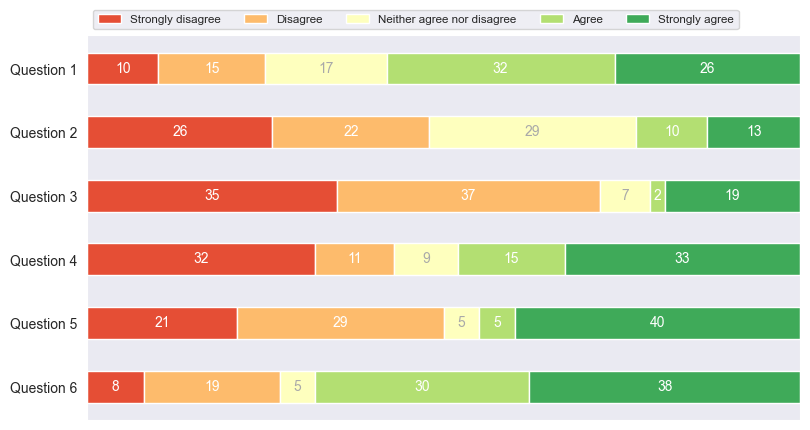

In [229]:
categorias = ['Partidos ganados', 'Partidos perdidos', 'Partidos no jugados']

